In [8]:
import pandas as pd
import sys
import numpy as np

#from pgmpy.utils import get_example_model

from pgmpy.sampling import BayesianModelSampling
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination,BeliefPropagation
from pgmpy.estimators import BayesianEstimator,MaximumLikelihoodEstimator,PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score, BicScore
from pgmpy.estimators import ExpectationMaximization as EM
from pgmpy.readwrite import XMLBIFWriter,XMLBIFReader

import scipy.stats as ss
#from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler

from collections import Counter
#from imblearn.over_sampling import RandomOverSampler

import networkx as nx
#import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,FunctionTransformer,KBinsDiscretizer,LabelBinarizer
from sklearn.model_selection import train_test_split

import json

In [9]:
silo1 = pd.read_csv(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/chvng/CHVNGE_OBSCARE_WCR.csv", sep=";"
)
silo1["silo"]="1"
silo2 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/CHEDV/CHEDV_OBSCARE_WCR_.xlsx",
    engine="openpyxl",
)
silo2["silo"]="2"
silo3 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/CHBV/CHBV_OBSCARE_WCR.xlsx",
    engine="openpyxl",
)

silo4 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/CHLN/CHLN_OBSCARE_WCR.xlsx",
    engine="openpyxl",
)

silo5 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/CHSJ/CHSJ_OBSCARE_WCR.xlsx",
    engine="openpyxl",
)

silo6 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/HSO/HSO_OBSCARE_WCR.xlsx",
    engine="openpyxl",
)

silo7 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/ULSAM/ULSAM_OBSCARE_WCR.xls"
)

silo8 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/ULSM/ULSM_OBSCARE_WCR_V1.xlsx",
    engine="openpyxl",
)

silo9 = pd.read_excel(
    "/Users/joaoalmeida/Desktop/tese_local/Obscare Giovana/CHTS/CHTS_OBSCARE_WCR_.xlsx",
    engine="openpyxl",
)
silo3["silo"]="3"
silo4["silo"]="4"
silo5["silo"]="5"
silo6["silo"]="6"
silo7["silo"]="7"
silo8["silo"]="8"
silo9["silo"]="9"

WARNING *** file size (5079264) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [10]:
silo1

,IDENTIFICADOR,DATA_PARTO,IDADE_MATERNA,GS,PESO_INICIAL,PESO_ADMISSAO_INTERNAMENTO,IMC,CIGARROS,ALCOOL,ESTUPEFACIENTES,...,HEMATOLOGICA,RESPIRATORIA,CEREBRAL,CARDIACA,TIPO_PARTO,APRESENTACAO_NO_PARTO,TRAB_PARTO_NO_PARTO,SEMANAS_GESTACAO_PARTO,GRUPO_ROBSON,silo
0,8 058,12/07/2018,34,"O,RH_NEGATIVO",62.0,NaN,27.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Cesariana,Cefálica de vértice,Ausência de trabalho de parto,28.0,10,1
1,8 058,12/07/2018,34,"O,RH_NEGATIVO",62.0,NaN,27.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Cesariana,Cefálica de vértice,Ausência de trabalho de parto,28.0,10,1
2,5 141,27/01/2017,24,"O,RH_POSITIVO",52.0,NaN,22.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,38.0,3,1
3,5 141,27/01/2017,24,"O,RH_POSITIVO",52.0,NaN,22.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,38.0,3,1
4,10 958,20/07/2020,36,"B,RH_POSITIVO",65.0,NaN,24.7,SIM,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,37.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8034,5 632,28/02/2017,28,"A,RH_POSITIVO",56.0,NaN,21.9,SIM,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Indução com misoprostol,41.0,2,1
8035,5 037,24/12/2016,38,"A,RH_POSITIVO",78.0,NaN,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto auxiliado por ventosa,Cefálica de vértice,Indução com dinoprostona,40.0,5,1
8036,10 135,25/09/2019,30,"A,RH_NEGATIVO",76.0,NaN,30.4,SIM,NaN,NaN,...,NaN,NaN,NaN,NaN,Cesariana,Cefálica de vértice,Indução com misoprostol,41.0,4,1
8037,6 576,26/12/2017,26,"B,RH_POSITIVO",90.0,NaN,31.5,NaN,NaN,NaN,...,NaN,NaN,NaN,SIM,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,39.0,1,1


In [11]:
dup_keys=["IDENTIFICADOR","DATA_PARTO","IDADE_MATERNA"]

In [12]:
silo1.drop_duplicates(subset=dup_keys,inplace=True)
silo2.drop_duplicates(subset=dup_keys,inplace=True)
silo3.drop_duplicates(subset=dup_keys,inplace=True)
silo4.drop_duplicates(subset=dup_keys,inplace=True)
silo5.drop_duplicates(subset=dup_keys,inplace=True)
silo6.drop_duplicates(subset=dup_keys,inplace=True)
silo7.drop_duplicates(subset=dup_keys,inplace=True)
silo8.drop_duplicates(subset=dup_keys,inplace=True)
silo9.drop_duplicates(subset=dup_keys,inplace=True)

In [13]:
full_data = pd.concat([silo1,silo2,silo3,silo4,silo5,silo6,silo7,silo8,silo9]).reset_index(drop=True)

In [14]:
full_data

,IDENTIFICADOR,DATA_PARTO,IDADE_MATERNA,GS,PESO_INICIAL,PESO_ADMISSAO_INTERNAMENTO,IMC,CIGARROS,ALCOOL,ESTUPEFACIENTES,...,HEMATOLOGICA,RESPIRATORIA,CEREBRAL,CARDIACA,TIPO_PARTO,APRESENTACAO_NO_PARTO,TRAB_PARTO_NO_PARTO,SEMANAS_GESTACAO_PARTO,GRUPO_ROBSON,silo
0,8 058,12/07/2018,34.0,"O,RH_NEGATIVO",62.0,NaN,27.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Cesariana,Cefálica de vértice,Ausência de trabalho de parto,28.0,10,1
1,5 141,27/01/2017,24.0,"O,RH_POSITIVO",52.0,NaN,22.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,38.0,3,1
2,10 958,20/07/2020,36.0,"B,RH_POSITIVO",65.0,NaN,24.7,SIM,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,37.0,3,1
3,11 104,10/10/2019,33.0,"O,RH_POSITIVO",74.0,NaN,27.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,39.0,3,1
4,5 407,04/03/2017,41.0,"A,RH_POSITIVO",98.0,NaN,35.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Indução com misoprostol,40.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73347,14179,11/06/2019,34.0,"B,RH_POSITIVO",60.0,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Cesariana,Pélvica,Ausência de trabalho de parto,39.1,7,9
73348,7082,29/06/2017,27.0,"O,RH_POSITIVO",64.0,NaN,22.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Espontâneo,40.4,1,9
73349,6579,20/04/2017,28.0,"A,RH_POSITIVO",69.0,NaN,25.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto eutócico cefálico,Cefálica de vértice,Indução com dinoprostona,38.4,4,9
73350,5070,27/12/2016,31.0,"B,RH_POSITIVO",48.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Parto auxiliado por ventosa,Cefálica de vértice,Espontâneo,39.3,1,9


In [15]:
nulls=full_data.isnull().sum()/len(full_data)*100

In [16]:
drop_cols=["IDENTIFICADOR","DATA_PARTO","G_TERAPEUTICA","NUM_RN"]
for name,k in nulls.items():
   # print(i)    #print(col_idx,k)
    if k>80:
        #print(name,k)
       # print(k,silo_1_unique.columns[col_idx])
        drop_cols.append(name)

In [17]:
full_data.drop(columns=drop_cols,inplace=True)

In [18]:
len(full_data.columns)

24

In [19]:
#list(full_data["G_TERAPEUTICA"].unique())
#transform all from SIM/NAO to S/N e similar
#BACIA [nan 'ADEQUADA' 'LIMITE' 'INADEQUADA' 'A' 'L']
standard_map={-7:np.nan,"ADEQUADA":"A","LIMITE":"L","DESCONHECIDO,RH_DESCONHECIDO":np.nan,"DESCONHECIDO,":np.nan,"SIM":"S","NAO":"N","-1":np.nan,-1:np.nan,"NS":np.nan,",":np.nan,"Sim":"S","UNKNOWN":np.nan,"Desconhecida":np.nan,"Desconhecido":np.nan,"DESCONHECIDO":np.nan," ":np.nan,"Desconhecido,":np.nan,"  ":np.nan}
def standardize_null(x,mapping):
    if x in mapping.keys():
        return mapping[x]
    if pd.isna(x):
        return np.nan
    return x

for col in full_data.columns:
    full_data[col]=full_data[col].apply(standardize_null,mapping=standard_map)

In [20]:
full_data["VIGIADA_CENTRO_SAUDE"].value_counts()

VIGIADA_CENTRO_SAUDE
S    49812
Name: count, dtype: int64

In [56]:
full_data.to_csv("test.csv")

In [3]:
fd=pd.read_csv("/Users/joaoalmeida/Desktop/test.csv")

VIGIADA_CENTRO_SAUDE
Sim    49513
S        299
Name: count, dtype: int64

In [21]:
ord_cols=["BISHOP_SCORE",
"BISHOP_CONSISTENCIA",
"BISHOP_DESCIDA",
"BISHOP_DILATACAO",
"BISHOP_EXTINCAO",
"BISHOP_POSICAO"]

int_cols = ["A_PARA","A_GESTA","EUTOCITO_ANTERIOR","VENTOSAS_ANTERIOR","FORCEPS_ANTERIOR","CESARIANAS_ANTERIOR",
    "IDADE_MATERNA",
    "PESO_INICIAL",
    "IMC",
    "NUMERO_CONSULTAS_PRE_NATAL",
    "IDADE_GESTACIONAL_ADMISSAO",
    "SEMANAS_GESTACAO_PARTO",
    "PESO_ADMISSAO_INTERNAMENTO",
    "ESTIMATIVA_PESO_ECO_30",
    "ESTIMATIVA_PESO_ECO_31",
    "ESTIMATIVA_PESO_ECO_32",
    "ESTIMATIVA_PESO_ECO_24",
"ESTIMATIVA_PESO_ECO_25",
"ESTIMATIVA_PESO_ECO_26",
"ESTIMATIVA_PESO_ECO_27",
"ESTIMATIVA_PESO_ECO_28",
"ESTIMATIVA_PESO_ECO_29",
"ESTIMATIVA_PESO_ECO_33",
"ESTIMATIVA_PESO_ECO_34",
"ESTIMATIVA_PESO_ECO_35",
"ESTIMATIVA_PESO_ECO_36",
"ESTIMATIVA_PESO_ECO_37",
"ESTIMATIVA_PESO_ECO_38",
"ESTIMATIVA_PESO_ECO_39",
"ESTIMATIVA_PESO_ECO_40",
"ESTIMATIVA_PESO_ECO_41"]
cat_cols = list(set(full_data.columns)  - set(int_cols) -set(ord_cols))

In [22]:
ord_cols=[col for col in ord_cols if col  in full_data.columns ]
int_cols=[col for col in int_cols if col  in full_data.columns ]


In [23]:
full_data[cat_cols]=full_data[cat_cols].astype(str)

In [24]:
numeric_transformer = Pipeline(
     steps=[#("dummy",'passthrough')
         (
            "imputer",
            SimpleImputer(
                missing_values=np.nan, strategy="median"
            )
        ),("kbins",KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile'))
    ]
)
ordinal_transformer= Pipeline(
    steps=[#("dummy",'passthrough')
         (
            "imputer",
            SimpleImputer(
                missing_values=np.nan, strategy="median"
            )
        )#,
    ]
)

categorical_transformer = Pipeline(
    steps=[ #("fun_str", fun_str),
       
        (
            "imputer",
            SimpleImputer(
                missing_values=np.nan, strategy="constant", fill_value="Unknown"
            )
        ),

                ("ordinalEncoder", OrdinalEncoder())

    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, int_cols),
        ("ord",ordinal_transformer,ord_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)
bn_pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

In [25]:
X_treated_bn=bn_pipeline.fit_transform(full_data)

/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dq/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consi

In [45]:
cols=int_cols
cols.extend(ord_cols)
cols.extend(cat_cols)

In [48]:
ff=pd.DataFrame(X_treated_bn,columns=cols)

In [50]:
ff["A_PARA"].value_counts()

A_PARA
1.0    64771
0.0     8581
Name: count, dtype: int64

In [51]:
full_data["A_PARA"].value_counts()

A_PARA
1.0     27559
0.0      8581
2.0      6253
3.0      1418
4.0       382
5.0       123
6.0        39
7.0        18
8.0         9
9.0         4
15.0        1
Name: count, dtype: int64

In [52]:
bn_pipeline.inverse_transform(ff)

AttributeError: This 'Pipeline' has no attribute 'inverse_transform'

In [55]:
import sklearn
sklearn.__version__

'1.0.2'

In [18]:
#import joblib
#joblib.dump(bn_learn_pipeline, 'pipeline.sav')

In [19]:
def get_score_for_not_match(query):
    probas=query.values
    rr=ss.rankdata([-el for el in probas], method="max") #Negative so we make the reverse

    pred_idx=query.values.argmax()
    pred=query.state_names[varia][pred_idx]
    pred_proba=probas[pred_idx]
    pred_ranking=rr[pred_idx]

    true=df_bn.loc[i,varia]
    true_idx=query.state_names[varia].index(true)
    true_proba=probas[true_idx]
    true_ranking=rr[true_idx]

    y_true.append(true)
    y_pred.append(pred)
    y_score.append(probas)
    y_ranking_true.append(true_ranking)
    y_ranking_pred.append(pred_ranking)
    
    return pred,pred_proba,pred_ranking,true,true_proba,true_ranking

## New eval - full

In [20]:
X_train, X_test = train_test_split(X_treated_df, test_size=0.20, random_state=42)

# Learn structure of initial model from data
scoring = BicScore(X_train)
scoring= K2Score(X_train)
est = HillClimbSearch(X_train)
model = est.estimate(scoring_method=scoring)
# Define a model structure with latent variables
model_latent = BayesianNetwork(
    model, latents=["L1", "L2","L4","L3","L5"]
)

model_latent.fit(X_train, estimator=MaximumLikelihoodEstimator)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [21]:
var_mapping={'IDADE_MATERNA': 'IA',
 'GS': 'GS',
 'PESO_INICIAL': 'PI',
 'PESO_ADMISSAO_INTERNAMENTO': 'PAI',
 'IMC': 'IMC',
 'CIGARROS': 'CIG',
 'ALCOOL': 'ALC',
 'ESTUPEFACIENTES': 'ESTP',
 'A_PARA': 'APARA',
 'A_GESTA': 'AGESTA',
 'EUTOCITO_ANTERIOR': 'EA',
 'VENTOSAS_ANTERIOR': 'VA',
 'FORCEPS_ANTERIOR': 'FA',
 'CESARIANAS_ANTERIOR': 'CA',
 'TIPO_GRAVIDEZ': 'TG',
 'VIGIADA': 'V',
 'NUMERO_CONSULTAS_PRE_NATAL': 'NRCPN',
 'VIGIADA_PARICULAR': 'VP',
 'VIGIADA_CENTRO_SAUDE': 'VCS',
 'VIGIADA_NESTE_HOSPITAL': 'VNH',
 'E_ALT_UT': 'EALTUT',
 'BACIA': 'B',
 'APRESENTACAO_ADMISSAO': 'AA',
 'BISHOP_SCORE': 'BS',
 'BISHOP_CONSISTENCIA': 'BC',
 'BISHOP_DESCIDA': 'BDE',
 'BISHOP_DILATACAO': 'BDI',
 'BISHOP_EXTINCAO': 'BE',
 'BISHOP_POSICAO': 'BP',
 'IDADE_GESTACIONAL_ADMISSAO': 'IGA',
 'TRAB_PARTO_ENTRADA_ESPONTANEO': 'TPEE',
 'TRAB_PARTO_ENTRADA_INDUZIDO': 'TPEI',
 'RPM': 'RPM',
 'HIPERTENSAO_CRONICA': 'HC',
 'HIPERTENSAO_GESTACIONAL': 'HG',
 'HIPERTENSAO_PRE_ECLAMPSIA': 'HPE',
 'DIABETES_GESTACIONAL': 'DG',
 'DIABETES_GESTACIONAL_DIETA': 'DGD',
 'DIABETES_GESTACIONAL_INSULINA': 'DGI',
 'DIABETES_GESTACIONAL_ANTIBIO': 'DGA',
 'DIABETES_MATERNA': 'DM',
 'DIABETES_TIPO1': 'DT1',
 'DIABETES_TIPO2': 'DT2',
 'HEMATOLOGICA': 'H',
 'RESPIRATORIA': 'R',
 'CEREBRAL': 'CE',
 'CARDIACA': 'CARD',
 'TIPO_PARTO': 'TP',
 'APRESENTACAO_NO_PARTO': 'ANP',
 'TRAB_PARTO_NO_PARTO': 'TPNP',
 'SEMANAS_GESTACAO_PARTO': 'SGP',
 'GRUPO_ROBSON': 'GR'}


In [22]:
labels={"ESTIMATIVA_PESO_ECO_30":"EPC30","APRESENTACAO_30":"A30"}
for k,v in var_mapping.items():
    if k in model_latent.nodes():
        labels[k]=v

In [23]:
inf=VariableElimination(model_latent)

In [27]:
X=X_treated_df.drop(columns="IDADE_MATERNA")
y=X_treated_df["IDADE_MATERNA"]

In [35]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=42,stratify=y)


In [39]:
X_train

,GS,PESO_INICIAL,IMC,A_PARA,A_GESTA,EUTOCITO_ANTERIOR,VENTOSAS_ANTERIOR,CESARIANAS_ANTERIOR,TIPO_GRAVIDEZ,VIGIADA,...,VIGIADA_NESTE_HOSPITAL,APRESENTACAO_ADMISSAO,IDADE_GESTACIONAL_ADMISSAO,TRAB_PARTO_ENTRADA_ESPONTANEO,TIPO_PARTO,APRESENTACAO_NO_PARTO,TRAB_PARTO_NO_PARTO,SEMANAS_GESTACAO_PARTO,GRUPO_ROBSON,silo
68002,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,...,8.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,5.0,2.0
65936,2.0,2.0,0.0,1.0,1.0,3.0,4.0,3.0,0.0,1.0,...,8.0,1.0,4.0,9.0,1.0,0.0,0.0,0.0,4.0,2.0
27347,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,...,4.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0
57097,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,7.0,1.0,4.0,5.0,2.0,0.0,0.0,0.0,1.0,1.0
55749,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,6.0,1.0,4.0,10.0,1.0,0.0,0.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32393,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,...,4.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,2.0,2.0
24369,0.0,0.0,1.0,0.0,0.0,1.0,6.0,1.0,0.0,1.0,...,4.0,1.0,4.0,5.0,1.0,0.0,0.0,6.0,1.0,2.0
26073,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,4.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0
37008,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [28]:
predicted_values = []
for _, row in X_train.drop(columns=['IDADE_MATERNA']).iterrows():
    
    evidence = row.to_dict()
    predicted_value = inf.query(variables=['IDADE_MATERNA'], evidence=evidence,show_progress=False)
    predicted_values.append(predicted_value)
    #stop ate 626 min map query

KeyboardInterrupt: 

In [26]:
inf2=BeliefPropagation(model_latent)

MemoryError: Unable to allocate 383. TiB for an array with shape (52580580433920,) and data type float64

In [ ]:
predicted_values = []
for _, row in X_train.iterrows():
    evidence = row.to_dict()
    predicted_value = inf2.query(variables=['IDADE_MATERNA'], evidence=evidence,show_progress=True)
    predicted_values.append(predicted_value)
    #stop ate 626 min map query

In [94]:
results={}
lb = LabelBinarizer()
for varia in X_treated_df.columns:
    print(X_treated_df[varia].value_counts())
    if X_treated_df[varia].value_counts().to_list()[-1]<5:
        sample_dict={}
        for k,v in X_treated_df[varia].value_counts().items():
            if v<10:
                sample_dict[k]=10
        X_resampled, y_resampled = RandomOverSampler(sampling_strategy=sample_dict).fit_resample(X_treated_df.drop(columns=[varia]), X_treated_df[varia])
        X_resampled[varia]=y_resampled
        X_train, X_test = train_test_split(X_resampled, test_size=0.15, random_state=42,stratify=X_resampled[varia])

    else:
        #print("normal")
        X_train, X_test = train_test_split(X_treated_df, test_size=0.15, random_state=42,stratify=X_treated_df[varia])

   # print(varia)
  #  print(X_test[varia].value_counts())
    y_true=[]
    y_pred=[]
    y_score=[]
    nan_i=0
   # if varia=="GS":
   #     continue
    #lb.fit(list(inf.state_names_map[varia].values()))
    lb.fit(list(inf.model.states[varia]))
    for idx,row in X_test.iterrows():
    
 
        evidence=row.to_dict()
        true=evidence[varia]
        del(evidence[varia])
       # del(evidence["GS"])
        try:
            query = inf.query(variables=[varia], evidence=evidence, show_progress=False)
        except:
            print(evidence)
            continue
      #  print(query.values)
        pred=query.state_names[varia][query.values.argmax()]
       # true=df_bn.loc[i,varia]
        if np.isnan(query.values).any(): ##WHY??
            nan_i+=1
            print("nan",varia,nan_i)
            continue
        y_true.append(true)
        y_pred.append(pred)
        y_score.append(query.values)

    y_true_multiclass=lb.transform(y_true)
    if len(query.state_names[varia])>2:
        try:
            #print("multi")
            auc_score=roc_auc_score(y_true_multiclass,y_score,multi_class="ovr")
        except Exception as err:
            print("error on",varia)
            print(err)
            print(y_score)
            print(y_true_multiclass)
            results[varia]=np.nan
            pass
    else:
        try:#print(y_true,y_score[:,0])
            auc_score=roc_auc_score(y_true,[k[1] for k in y_score])
        except Exception as err:
            print(varia,len(query.state_names[varia]),query.state_names[varia],y_score,err)
    print(varia,auc_score,"+++"*30)
    results[varia]=auc_score

IDADE_MATERNA
2.0    25789
1.0    24234
0.0    23329
Name: count, dtype: int64
{'GS': 2.0, 'PESO_INICIAL': 2.0, 'IMC': 2.0, 'A_PARA': 2.0, 'A_GESTA': 2.0, 'EUTOCITO_ANTERIOR': 1.0, 'VENTOSAS_ANTERIOR': 2.0, 'CESARIANAS_ANTERIOR': 1.0, 'TIPO_GRAVIDEZ': 0.0, 'VIGIADA': 1.0, 'NUMERO_CONSULTAS_PRE_NATAL': 4.0, 'VIGIADA_PARICULAR': 0.0, 'VIGIADA_CENTRO_SAUDE': 5.0, 'VIGIADA_NESTE_HOSPITAL': 1.0, 'APRESENTACAO_ADMISSAO': 3.0, 'IDADE_GESTACIONAL_ADMISSAO': 0.0, 'TRAB_PARTO_ENTRADA_ESPONTANEO': 0.0, 'TIPO_PARTO': 0.0, 'APRESENTACAO_NO_PARTO': 4.0, 'TRAB_PARTO_NO_PARTO': 8.0, 'SEMANAS_GESTACAO_PARTO': 2.0, 'GRUPO_ROBSON': 1.0, 'silo': 1.0}


In [ ]:
results

{'IDADE_MATERNA': 0.6737349709962622,
 'PESO_INICIAL': 0.8731394192266649,
 'IMC': 0.8723092963440585,
 'NUMERO_CONSULTAS_PRE_NATAL': 0.7026017196832036,
 'IDADE_GESTACIONAL_ADMISSAO': 0.9548229093771985,
 'SEMANAS_GESTACAO_PARTO': 0.9616565345996628,
 'ESTIMATIVA_PESO_ECO_30': 0.9459226059506882,
 'A_PARA': 0.9892131469598625,
 'A_GESTA': 0.9307359487126963,
 'EUTOCITO_ANTERIOR': 0.9930150377100454,
 'VENTOSAS_ANTERIOR': 0.9615017160736956,
 'FORCEPS_ANTERIOR': 0.9615017160736956,
 'CESARIANAS_ANTERIOR': 0.9975988555322337,
 'APRESENTACAO_ADMISSAO': 0.786604381786791,
 'TIPO_PARTO': 0.8680944090827355,
 'APRESENTACAO_30': 0.8626041444715101,
 'GRUPO_ROBSON': 0.9362960961421336,
 'APRESENTACAO_NO_PARTO': 0.9999803285138192,
 'VIGIADA_CENTRO_SAUDE': 0.7296398806740644,
 'TIPO_GRAVIDEZ': 0.8364234917011212,
 'TRAB_PARTO_ENTRADA_ESPONTANEO': 0.8420418165362942,
 'VIGIADA': 0.9873035384201548,
 'VIGIADA_NESTE_HOSPITAL': 0.8488792074878834,
 'TRAB_PARTO_NO_PARTO': 0.9281473235900245,
 'VIGI

In [ ]:
X_train, X_test = train_test_split(X_treated_df, test_size=0.10, random_state=42)

# Learn structure of initial model from data
scoring = BicScore(X_train)
scoring= K2Score(X_train)
est = HillClimbSearch(X_train)
model = est.estimate(scoring_method=scoring)
# Define a model structure with latent variables


#model.add_cpds(cpd_X, cpd_Latent, cpd_Y)

model_latent = BayesianNetwork(model)

model_latent.fit(X_train, estimator=MaximumLikelihoodEstimator)

In [ ]:
####more reps
results={}
lb = LabelBinarizer()
random.seed(10)

for varia in X_treated_df.columns:
    results[varia]=[]
    y_true=[]
    y_pred=[]
    y_score=[]
    nan_i=0
    for i in range(0,10):
        rng=random.randint(0,42)
        #print(X_treated_df[varia].value_counts())
        if X_treated_df[varia].value_counts().to_list()[-1]<5:
            sample_dict={}
            for k,v in X_treated_df[varia].value_counts().items():
                if v<10:
                    sample_dict[k]=10
            X_resampled, y_resampled = RandomOverSampler(sampling_strategy=sample_dict).fit_resample(X_treated_df.drop(columns=[varia]), X_treated_df[varia])
            X_resampled[varia]=y_resampled
            X_train, X_test = train_test_split(X_resampled, test_size=0.15, random_state=rng,stratify=X_resampled[varia])

        else:
            #print("normal")
            X_train, X_test = train_test_split(X_treated_df, test_size=0.15, random_state=rng,stratify=X_treated_df[varia])

        # Learn structure of initial model from data
        scoring = BicScore(X_train)
        scoring= K2Score(X_train)
        est = HillClimbSearch(X_train)
        model = est.estimate(scoring_method=scoring)
        model_latent = BayesianNetwork(model)
        model_latent.fit(X_train, estimator=MaximumLikelihoodEstimator)
        inf=VariableElimination(model_latent)
    # if varia=="GS":
    #     continue
        #lb.fit(list(inf.state_names_map[varia].values()))
        lb.fit(list(inf.model.states[varia]))
        for idx,row in X_test.iterrows():
        
    
            evidence=row.to_dict()
            true=evidence[varia]
            del(evidence[varia])
        # del(evidence["GS"])
            try:
                query = inf.query(variables=[varia], evidence=evidence, show_progress=False)
            except:
                print(evidence)
                continue
        #  print(query.values)
            pred=query.state_names[varia][query.values.argmax()]
        # true=df_bn.loc[i,varia]
            if np.isnan(query.values).any(): ##WHY??
                nan_i+=1
                print("nan",varia,nan_i)
                print(query.state_names[varia])
                print(query.values)
                continue
            y_true.append(true)
            y_pred.append(pred)
            y_score.append(query.values)

        y_true_multiclass=lb.transform(y_true)
        if len(query.state_names[varia])>2:
            try:
                #print("multi")
                auc_score=roc_auc_score(y_true_multiclass,y_score,multi_class="ovr")
            except Exception as err:
                print("error on",varia)
                print(err)
                print(y_score)
                print(y_true_multiclass)
                results[varia]=np.nan
                pass
        else:
            try:#print(y_true,y_score[:,0])
                auc_score=roc_auc_score(y_true,[k[1] for k in y_score])
            except Exception as err:
                print(varia,len(query.state_names[varia]),query.state_names[varia],y_score,err)
        print(varia,auc_score,"+++"*30)
        results[varia].append(auc_score)

In [142]:
results_dd={k:[round(v,3)] for k,v in results.items()}

In [330]:
results_df=pd.DataFrame.from_dict(results_dd)
results_df=results_df.T
results_df.rename(index=labels,inplace=True)
results_df.loc['average'] = results_df.mean()
results_df.reset_index(inplace=True)
results_df.rename(columns={"index": "Column", 0: "AUROC"},inplace=True)

## Create final with all data

In [43]:
scoring= K2Score(full_data)
est = HillClimbSearch(full_data)
model = est.estimate(scoring_method=scoring)
# Define a model structure with latent variables
model_latent = BayesianNetwork(
    model, latents=["L1", "L2","L4","L3","L5"]
)

model_latent.fit(full_data, estimator=MaximumLikelihoodEstimator)

  0%|                                  | 66/1000000 [01:32<388:52:32,  1.40s/it]


### save to file

In [47]:
writer = XMLBIFWriter(model_latent)
writer.write_xmlbif('model_2.xml')

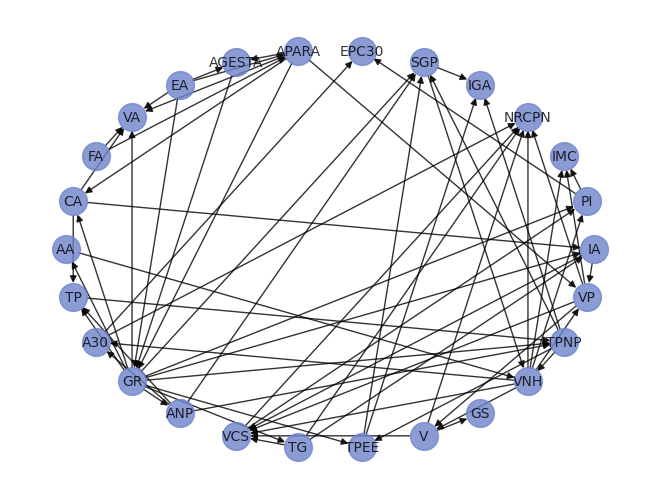

In [222]:
nx.draw_circular(model_latent, node_color='#6E83CB',  with_labels=True,font_size=10,node_size=400,alpha=0.8,labels=labels)
plt.savefig("network.png")

In [ ]:
#reader = XMLBIFReader('sss.xml')


In [ ]:
#model=reader.get_model()

In [ ]:
#model

In [ ]:
#reader = XMLBIFReader('docker-ml-data-quality/first_model.xml')
#model = reader.get_model()